# SVM算法原理
支持向量机是一种二类分类模型。它的基本模型是定义在特征空间上的间隔最大的线性分类器，您可能会疑惑什么是线性可分，我们会介绍这一概念。
### 线性可分
在二维空间上，两类点被一条直线完全分开叫做线性可分。
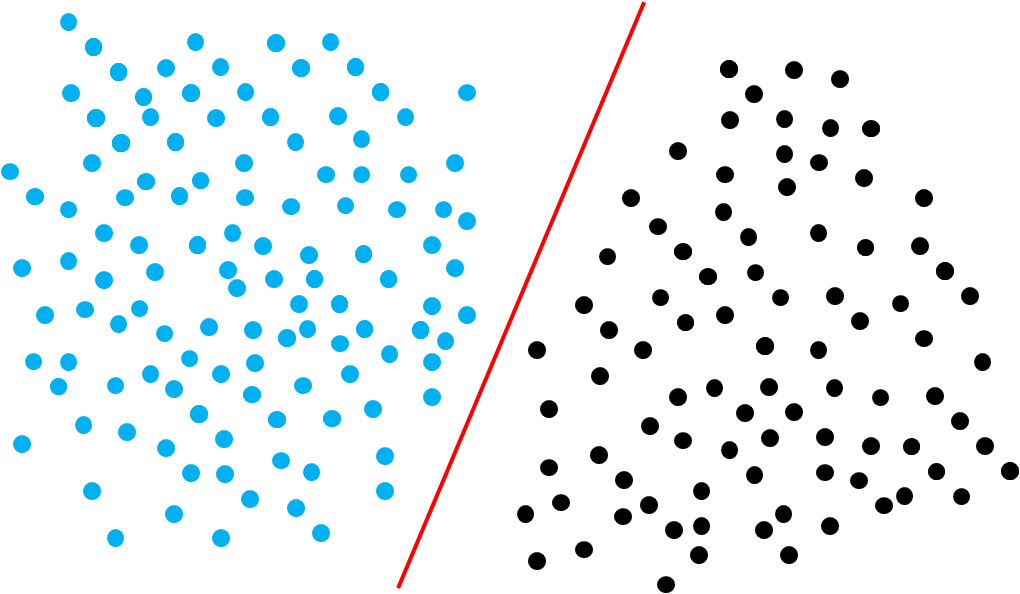
它的数学定义是：D0和D1是n维欧式空间的两个点集。如果存在n维向量w和实数b，使得所有属于D0的点Xi都有图片
而对于所有属于D1的点Xj则有图片
我们称D0和D1线性可分。
我们知道，在一个平面当中，能把两类点分开的直线可能有很多条，如下图所示
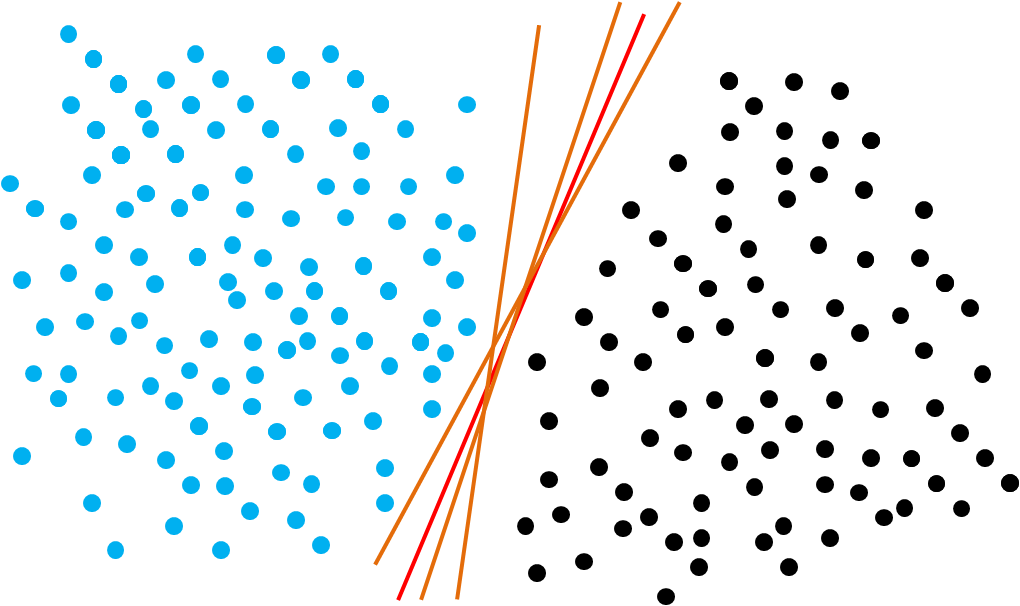
对于淡蓝色的点，如果这些点到分类直线的距离越大，再产生的新点的特性如果与淡蓝色点相似，也会与淡蓝色集合点分布在同一侧，表明与淡蓝色集合点属于同一个类别，分类更加精确。同理，对于黑色点来说，这条分类直线离他们的距离也越远越好。了解这个概念之后，我们能得到二维线性可分问题的目标函数：（关于目标函数的推导，我会放在附录，如果您感兴趣，可以查看）
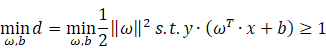
# 核函数

1.线性核函数（Linear Kernel）

图片
主要用于**线性可分**的情况。在原始空间中寻找最优线性分类器，具有参数少，速度快的优势。通常，我们首先采用线性核函数先进行分类尝试。

2.多项式核函数（Polynomial Kernel）

图片

多项式核函数可以实现将低维的输入空间映射到高纬的特征空间，属于全局核函数，参数d越大，映射的维度也越高，计算量就会越大，容易出现“过拟合”的现象

3.高斯核函数（Gaussian Kernel）

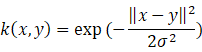
高斯核函数是一种局部性较强的函数，改函数是应用最广的一个，无论在大样本或者在小样本都有比较好的性能，且相对于多项式核函数来说参数更少。当数据点距离中心点变远时，取值会变小。高斯核函数对数据中存在的噪声有着较好的抗干扰能力，由于其很强的局部性，其参数决定了函数作用范围，随着参数σ的增大而减弱。

4.Sigmoid核函数（Sigmoid Kernel）

图片
采用Sigmoid函数作为核函数时，支持向量机实现的就是一种多层感知器神经网络，该核函数被广泛运用于深度学习和机器学习中。

5.如何选择

吴恩达教授曾经给出过一系列的选择核函数的方法：
1. 当样本的特征很多时，特征的维数很高，这是往往样本线性可分，可考虑用线性核函数的SVM或LR
2. 当样本的数量很多，但特征较少时，可以手动添加一些特征，使样本线性可分，再考虑用线性核函数的SVM或LR。
3. 当样特征维度不高时，样本数量也不多时，考虑用高斯核函数

# 代码示例
以鸢尾花数据集为例。

1.导入鸢尾花数据集

In [1]:
# 导入数据集
from sklearn import datasets
iris = datasets.load_iris()

2.划分数据集

In [2]:
# 数据集划分
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

3.训练SVM分类器

In [3]:
# 训练SVM分类器
from sklearn import svm
S = svm.SVC(C = 1.0,kernel='rbf',decision_function_shape='ovr',gamma=0.01)
S.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### 参数详解

对于svm的SVC参数，我们主要关注以下几个部分
1. C：惩罚参数，默认值为1。C越大，对**误**分类的惩罚增大，趋向于全部分对的状况，这样对
训练集的测试率很高，但泛化能力较弱。C越小，对误分类的惩罚减小，允许容错，泛化能力较强。
2. kernel：核函数，默认值是rbf，也可以是'linear','poly','sigmid','precomputed'，不同的核函数对应有不同的参数，比如对于rbf，gamma就是他的参数，一般取1/n。如何选择kernel，则需要具体问题、具体分析。

4.显示分类器分类结果

In [4]:
# 显示分类器分类结果
print('训练：%.3f'%S.score(x_train,y_train))
print('测试：%.3f'%S.score(x_test,y_test))

训练：0.933
测试：0.933


# 作业
使用sklearn提供的SVM的API对手写数字数据集的数据进行预测，手写数字数据集使用方法如下:

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

# 参考来源

1. 《统计学习方法》 李航
2. [https://www.cnblogs.com/fuqia/p/8963429.html](https://www.cnblogs.com/fuqia/p/8963429.html)
3. [https://blog.csdn.net/sunflower_sara/article/details/81228112](https://blog.csdn.net/sunflower_sara/article/details/81228112)
# 附录

### 二维线性可分问题目标函数推导

点到直线的距离公式

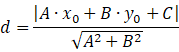

那么，对于wx+b=0的直线形式，有一个点x到该直线的距离公式为

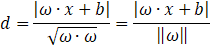

对于二维线性可分，我们想要每个支持向量（样本中里超平面（这里是直线）距离最近的点）到直线的距离最大，即我们需要找到d的最大值

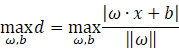

接下来，我们对该公式进行下一步的简化

![Image Name](https://cdn.kesci.com/upload/image/qvx5fit4an.png)
在二维空间中，我们作wx+b=c以及wx+b=-c，满足这两条直线到wx+b=0的距离相等。对于一条直线wx+b=c，我们相同比例缩小系数，这条直线和原来的直线还是同一条直线。现在将他缩小为：

![Image Name](https://cdn.kesci.com/upload/image/qvx5gty4tt.png)

我们发现，对于直线wx+b = c，我们可以找到w1=w/c，b1=b/c，使得w1*x+b1=1。

![Image Name](https://cdn.kesci.com/upload/image/qvx5i8trcq.png)

将该结果代入，我们可以抽象出目标函数

![Image Name](https://cdn.kesci.com/upload/image/qvx5iwrf8k.png)

同时，该函数应该满足以下约束：
![Image Name](https://cdn.kesci.com/upload/image/qvx5jdfwqi.png)
即：
![Image Name](https://cdn.kesci.com/upload/image/qvx5k4b9o9.png)
我们对他做一个转换取倒数可得
![Image Name](https://cdn.kesci.com/upload/image/qvx5kzy5j3.png)
为方便计算，我们可以得到：

![Image Name](https://cdn.kesci.com/upload/image/qvx5lurtp3.png)